# Machine Learning Application


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing
df = pd.read_csv("S:\sem 3\ML and AI\Data setss\diabeties_prediction.csv")
df.head()


,Diabetes_No DiabetesPrediabetesDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Yes Cholesterol Check in 5 years,40.0,1.0,Yes,No,No,No,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,No Diabetes,No High BP,No High Cholesterol,No Cholesterol Check in 5 years,25.0,1.0,Yes,No,Yes,No,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,No Diabetes,High BP,High Cholesterol,NaN,28.0,0.0,No,No,No,Yes,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,No Diabetes,High BP,No High Cholesterol,Yes Cholesterol Check in 5 years,27.0,0.0,No,No,Yes,Yes,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,No Diabetes,High BP,High Cholesterol,Yes Cholesterol Check in 5 years,24.0,0.0,No,No,NaN,Yes,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Exploratory Data Analysis


In [4]:
df.head()


,Diabetes_No DiabetesPrediabetesDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Yes Cholesterol Check in 5 years,40.0,1.0,Yes,No,No,No,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,No Diabetes,No High BP,No High Cholesterol,No Cholesterol Check in 5 years,25.0,1.0,Yes,No,Yes,No,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,No Diabetes,High BP,High Cholesterol,NaN,28.0,0.0,No,No,No,Yes,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,No Diabetes,High BP,No High Cholesterol,Yes Cholesterol Check in 5 years,27.0,0.0,No,No,Yes,Yes,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,No Diabetes,High BP,High Cholesterol,Yes Cholesterol Check in 5 years,24.0,0.0,No,No,NaN,Yes,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Changing categories to numbers

Data Cleaning is needed after observing categorical values are to be changed in numericals


In [5]:
from sklearn.preprocessing import LabelEncoder

# Define mapping dictionaries for each column
diabetes_mapping = {'No Diabetes': 0,
                    'Diabetes': 2, 'Prediabetes': 1, '': "NaN"}
highBP_mapping = {'High BP': 1, 'No High BP': 0}
highChol_mapping = {'High Cholesterol': 1, 'No High Cholesterol': 0}
cholCheck_mapping = {'Yes Cholesterol Check in 5 years': 1,
                     'No Cholesterol Check in 5 years': 0}
yes_no_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the DataFrame and convert to integer type
df['Diabetes_No DiabetesPrediabetesDiabetes'] = df['Diabetes_No DiabetesPrediabetesDiabetes'].map(
    diabetes_mapping).astype('Int64')
df['HighBP'] = df['HighBP'].map(highBP_mapping).astype('Int64')
df['HighChol'] = df['HighChol'].map(highChol_mapping).astype('Int64')
df['CholCheck'] = df['CholCheck'].map(cholCheck_mapping).astype('Int64')
df['Stroke'] = df['Stroke'].map(yes_no_mapping).astype('Int64')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map(
    yes_no_mapping).astype('Int64')
df['PhysActivity'] = df['PhysActivity'].map(yes_no_mapping).astype('Int64')
df['Fruits'] = df['Fruits'].map(yes_no_mapping).astype('Int64')

df.head()


,Diabetes_No DiabetesPrediabetesDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1.0,1,0,0,0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0,0,0,25.0,1.0,1,0,1,0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1,1,<NA>,28.0,0.0,0,0,0,1,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1,0,1,27.0,0.0,0,0,1,1,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1,1,1,24.0,0.0,0,0,<NA>,1,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# checking all the columns
df.columns


Index(['Diabetes_No DiabetesPrediabetesDiabetes', 'HighBP', 'HighChol',
       'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [7]:
# Checking the unique
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("\n")


Column: Diabetes_No DiabetesPrediabetesDiabetes
<IntegerArray>
[0, 2, <NA>, 1]
Length: 4, dtype: Int64


Column: HighBP
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


Column: HighChol
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


Column: CholCheck
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


Column: BMI
[40. 25. 28. 27. 24. 30. nan 34. 26. 33. 21. 23. 38. 32. 37. 31. 22. 20.
 35. 45. 39. 29. 19. 47. 18. 36. 43. 55. 49. 17. 16. 41. 42. 44. 50. 59.
 48. 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73.
 85. 67. 60. 70. 82. 79. 92. 68. 65. 72. 88. 96. 13. 81. 71. 75. 12. 77.
 69. 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]


Column: Smoker
[ 1.  0. nan]


Column: Stroke
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


Column: HeartDiseaseorAttack
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


Column: PhysActivity
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


Column: Fruits
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int6

In [8]:
df.describe().T  # descriptive statitics


,count,mean,std,min,25%,50%,75%,max
Diabetes_No DiabetesPrediabetesDiabetes,241380.0,0.297083,0.698330,0.0,0.0,0.0,0.0,2.0
HighBP,241300.0,0.428537,0.494868,0.0,0.0,0.0,1.0,1.0
HighChol,241386.0,0.424184,0.494219,0.0,0.0,0.0,1.0,1.0
CholCheck,241295.0,0.962668,0.189574,0.0,1.0,1.0,1.0,1.0
BMI,241159.0,28.382146,6.612355,12.0,24.0,27.0,31.0,98.0
Smoker,241323.0,0.443024,0.496744,0.0,0.0,0.0,1.0,1.0
Stroke,241323.0,0.443024,0.496744,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,241314.0,0.094251,0.292178,0.0,0.0,0.0,0.0,1.0
PhysActivity,241238.0,0.756705,0.429073,0.0,1.0,1.0,1.0,1.0
Fruits,241411.0,0.634109,0.481680,0.0,0.0,1.0,1.0,1.0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Diabetes_No DiabetesPrediabetesDiabetes  241380 non-null  Int64  
 1   HighBP                                   241300 non-null  Int64  
 2   HighChol                                 241386 non-null  Int64  
 3   CholCheck                                241295 non-null  Int64  
 4   BMI                                      241159 non-null  float64
 5   Smoker                                   241323 non-null  float64
 6   Stroke                                   241323 non-null  Int64  
 7   HeartDiseaseorAttack                     241314 non-null  Int64  
 8   PhysActivity                             241238 non-null  Int64  
 9   Fruits                                   241411 non-null  Int64  
 10  Veggies                         

In [10]:
print(df.isnull().sum())  # null values


Diabetes_No DiabetesPrediabetesDiabetes    12300
HighBP                                     12380
HighChol                                   12294
CholCheck                                  12385
BMI                                        12521
Smoker                                     12357
Stroke                                     12357
HeartDiseaseorAttack                       12366
PhysActivity                               12442
Fruits                                     12269
Veggies                                    12239
HvyAlcoholConsump                          12252
AnyHealthcare                              12411
NoDocbcCost                                12416
GenHlth                                    12228
MentHlth                                   12415
PhysHlth                                   12396
DiffWalk                                   12460
Sex                                        12385
Age                                        12387
Education           

In [11]:
# Total null values
df.isnull().sum().sum()


272335

<AxesSubplot:>

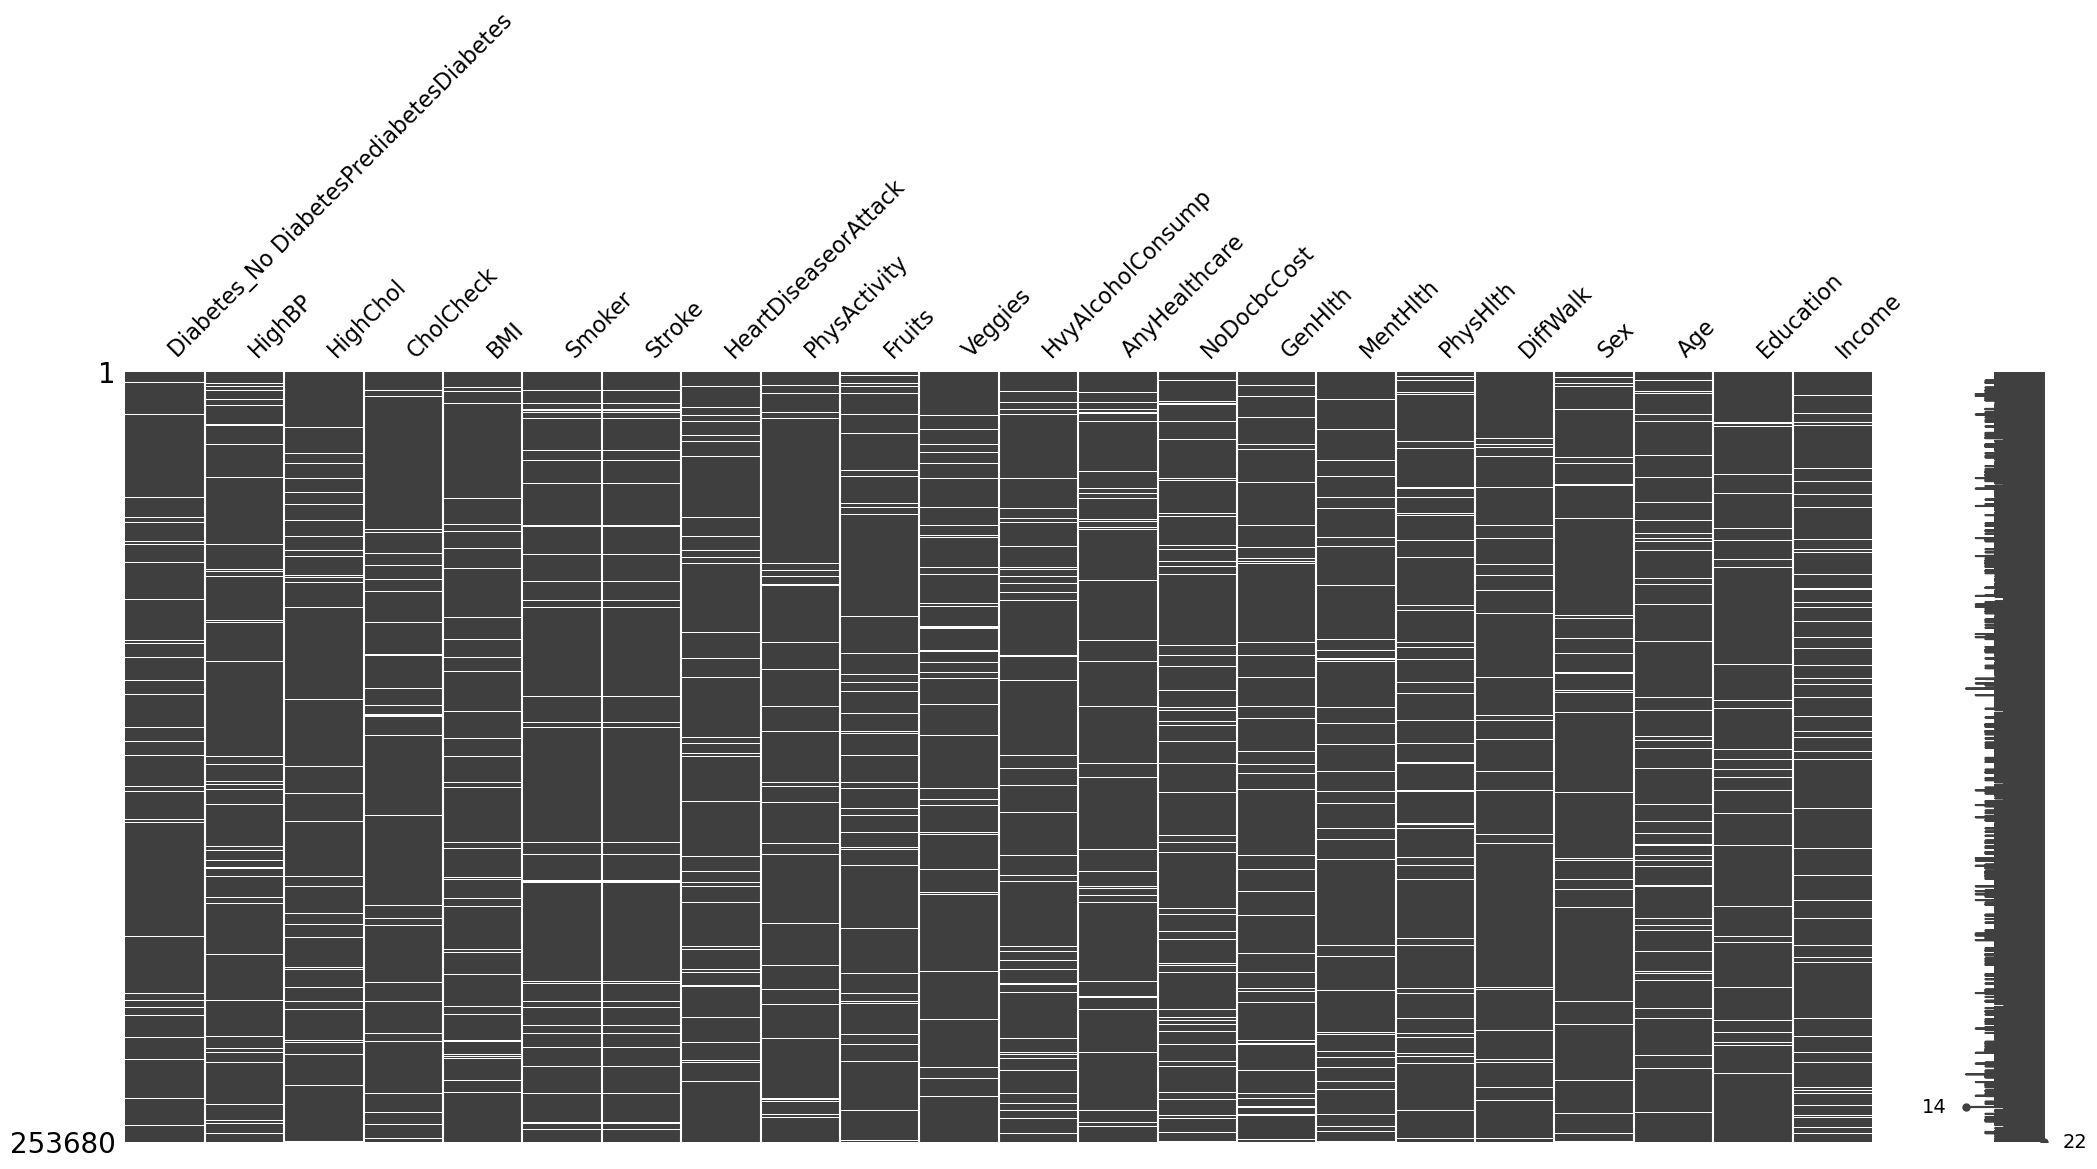

In [12]:
#!pip install -q missingno
import missingno as ms
# visulazing missing data
ms.matrix(df)


In [13]:
# null values row wise.
numberofnulls = df.iloc[:, :].isna().sum(1)
numberofnulls.max()


8

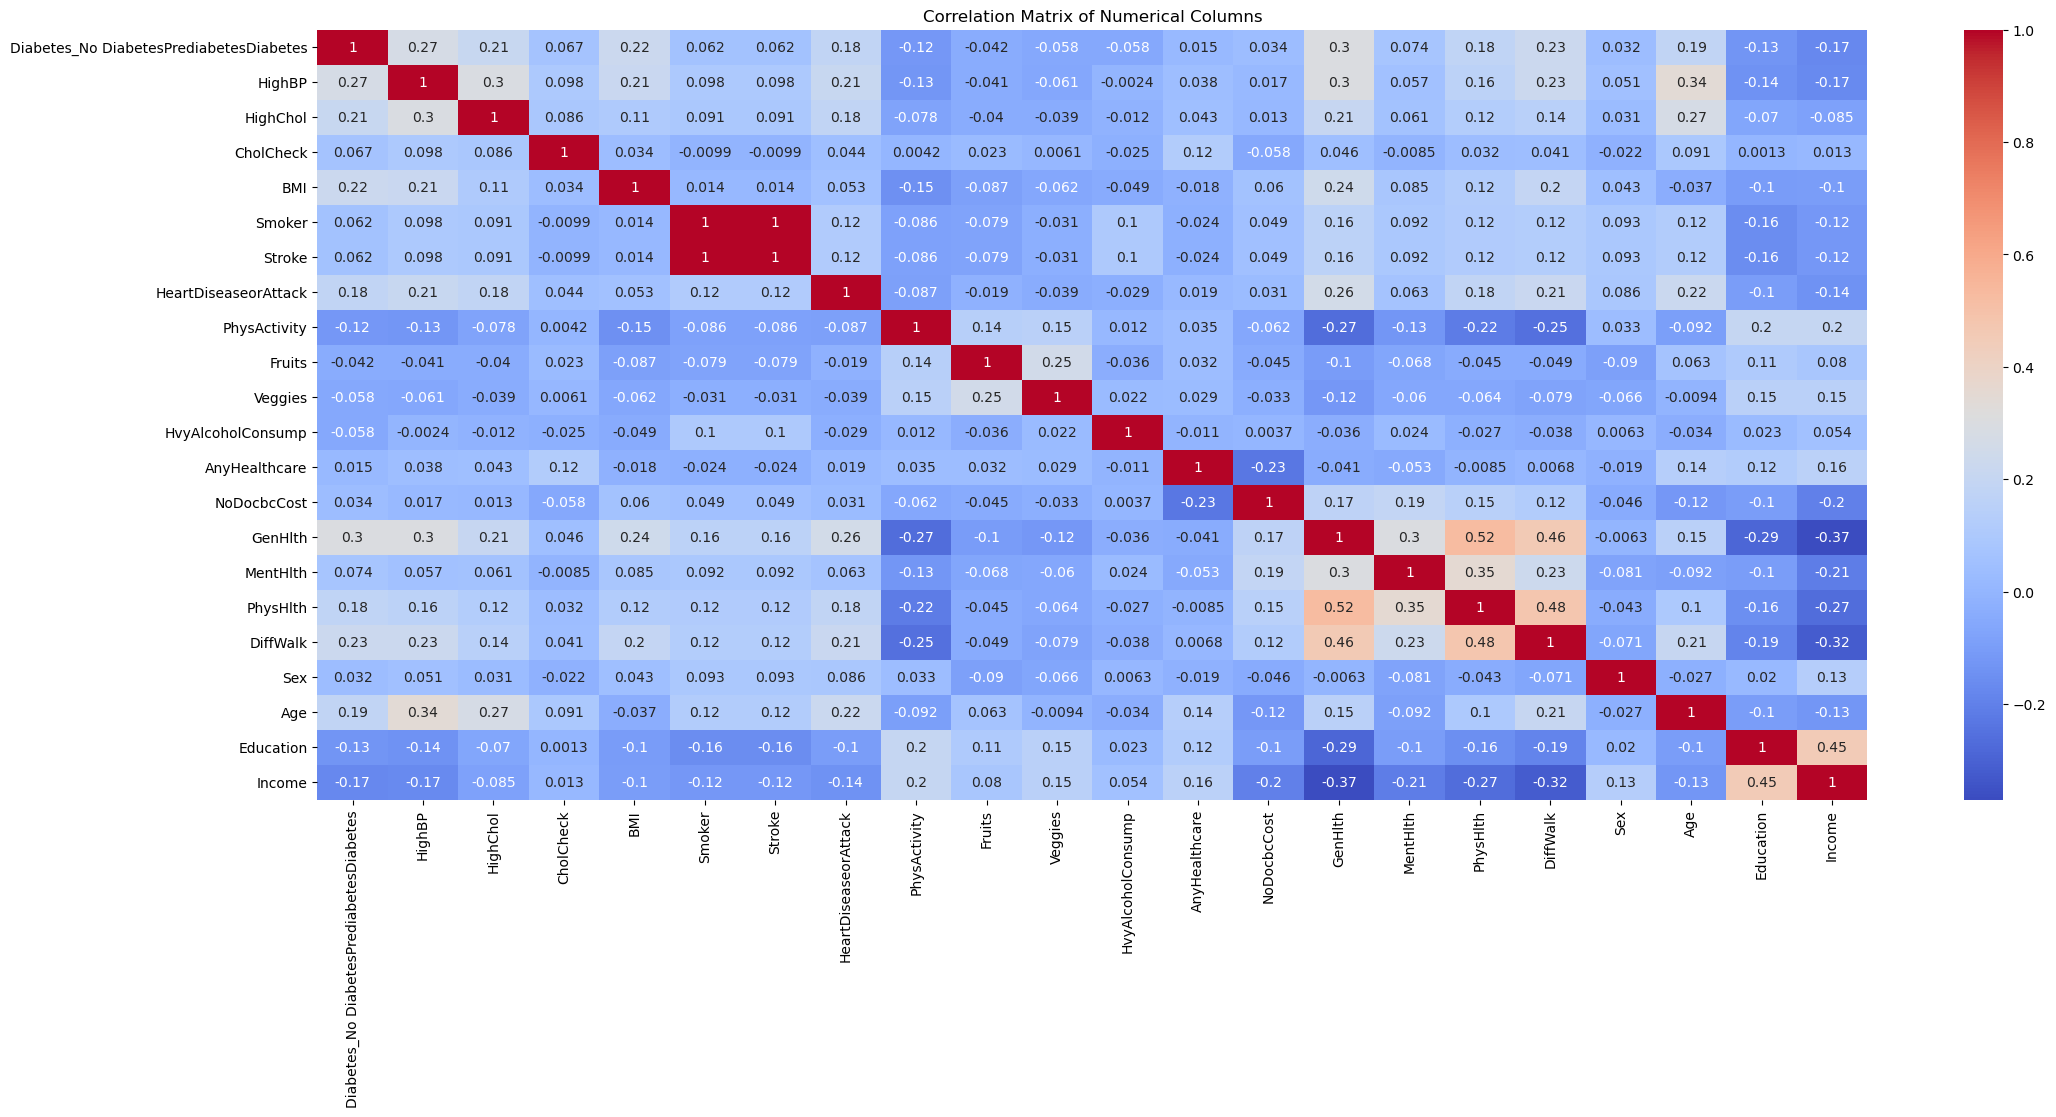

In [14]:
# Checking correlation between variables
correlation_matrix = df[['Diabetes_No DiabetesPrediabetesDiabetes', 'HighBP', 'HighChol',
                         'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                         'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                         'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
                         'DiffWalk', 'Sex', 'Age', 'Education', 'Income']].corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


# Feature engineering


In [15]:

from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Fit on the dataset and transform
df_imputed = imputer.fit_transform(df)

# Convert the imputed data back into a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

df_imputed['Diabetes_No DiabetesPrediabetesDiabetes'] = df_imputed['Diabetes_No DiabetesPrediabetesDiabetes'].round()


In [16]:
# droping column which is highly correlated to other.
df_imputed = df_imputed.drop(['Stroke'], axis=1)


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant for the intercept term
df_imputed['Intercept'] = 1

# Calculate the VIF
vif = pd.DataFrame()
vif["variables"] = df_imputed.columns
vif["VIF"] = [variance_inflation_factor(
    df_imputed.values, i) for i in range(df_imputed.shape[1])]

print(vif)


                                  variables         VIF
0   Diabetes_No DiabetesPrediabetesDiabetes    1.215482
1                                    HighBP    1.349166
2                                  HighChol    1.186512
3                                 CholCheck    1.032769
4                                       BMI    1.160586
5                                    Smoker    1.095281
6                      HeartDiseaseorAttack    1.158228
7                              PhysActivity    1.160373
8                                    Fruits    1.111669
9                                   Veggies    1.111551
10                        HvyAlcoholConsump    1.025287
11                            AnyHealthcare    1.108963
12                              NoDocbcCost    1.140731
13                                  GenHlth    1.836646
14                                 MentHlth    1.242847
15                                 PhysHlth    1.628938
16                                 DiffWalk    1

In [18]:
# Total null values
df_imputed.isnull().sum().sum()


0

In [19]:
df_imputed.describe().T


,count,mean,std,min,25%,50%,75%,max
Diabetes_No DiabetesPrediabetesDiabetes,253680.0,0.298695,0.690004,0.0,0.000000,0.0,0.0,2.0
HighBP,253680.0,0.427928,0.488284,0.0,0.000000,0.0,1.0,1.0
HighChol,253680.0,0.423432,0.487094,0.0,0.000000,0.0,1.0,1.0
CholCheck,253680.0,0.962676,0.186543,0.0,1.000000,1.0,1.0,1.0
BMI,253680.0,28.374830,6.514185,12.0,24.000000,27.0,31.0,98.0
Smoker,253680.0,0.441523,0.489192,0.0,0.000000,0.0,1.0,1.0
HeartDiseaseorAttack,253680.0,0.094105,0.287937,0.0,0.000000,0.0,0.0,1.0
PhysActivity,253680.0,0.758038,0.422494,0.0,0.666667,1.0,1.0,1.0
Fruits,253680.0,0.635559,0.474154,0.0,0.000000,1.0,1.0,1.0
Veggies,253680.0,0.812143,0.385050,0.0,1.000000,1.0,1.0,1.0


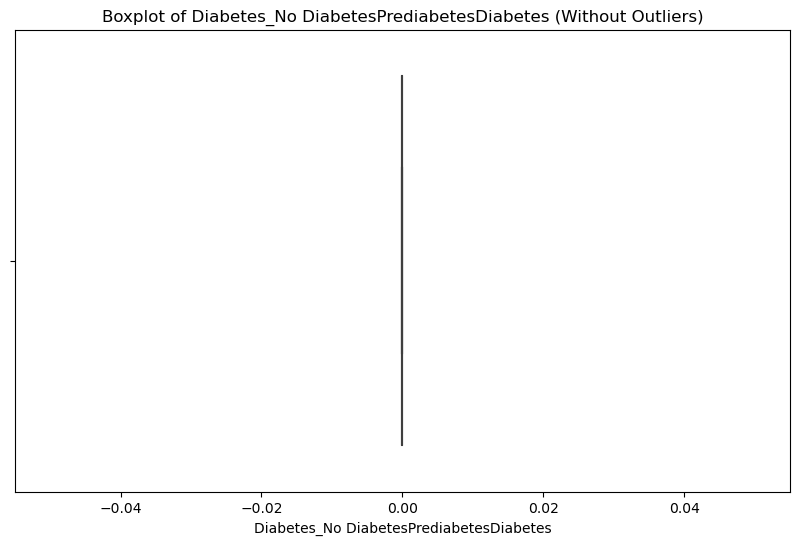

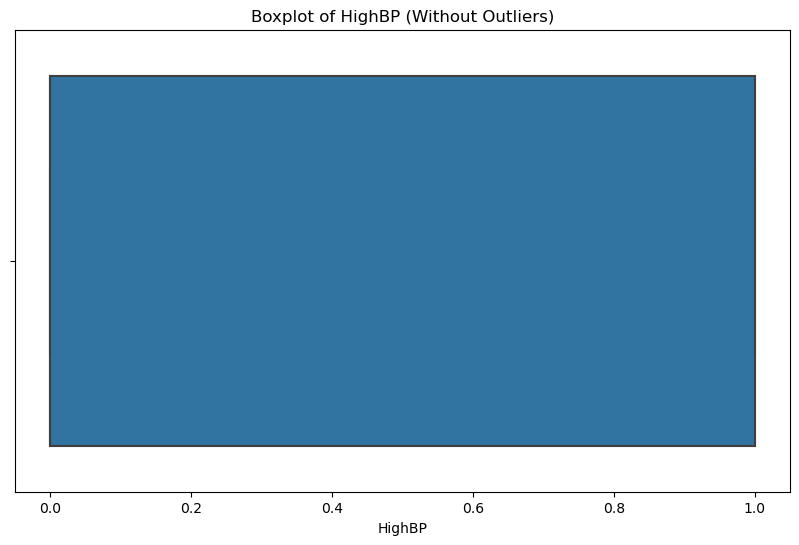

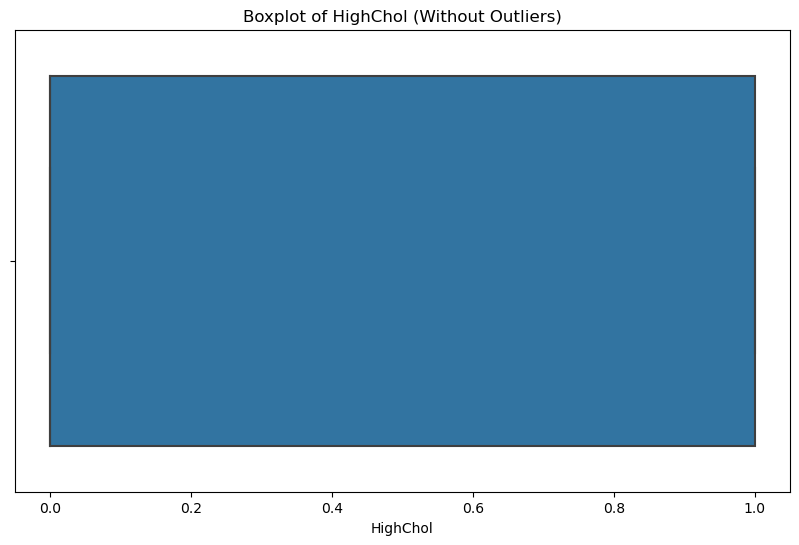

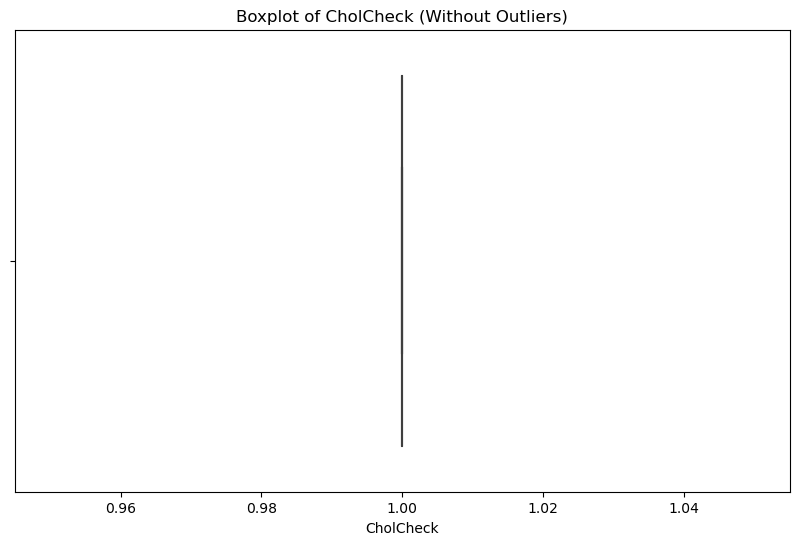

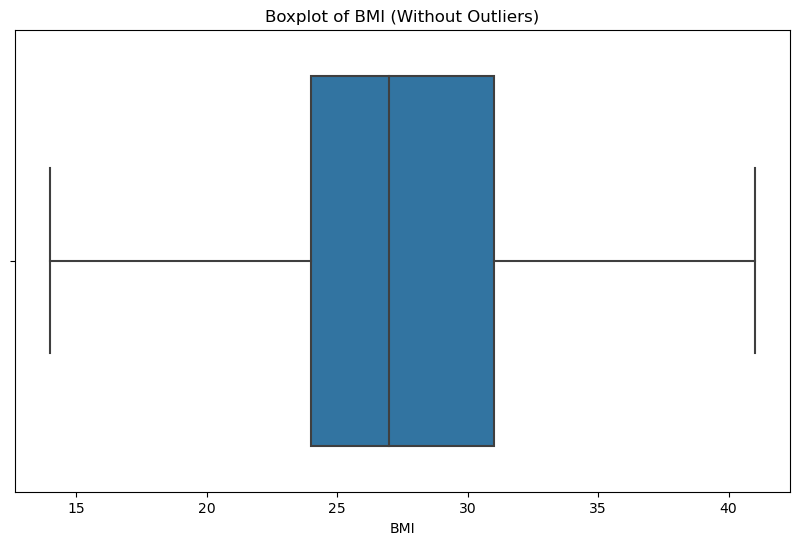

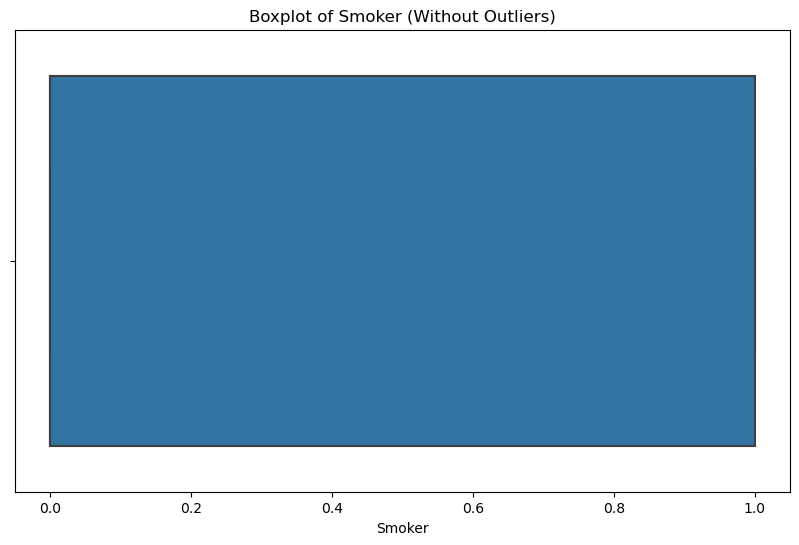

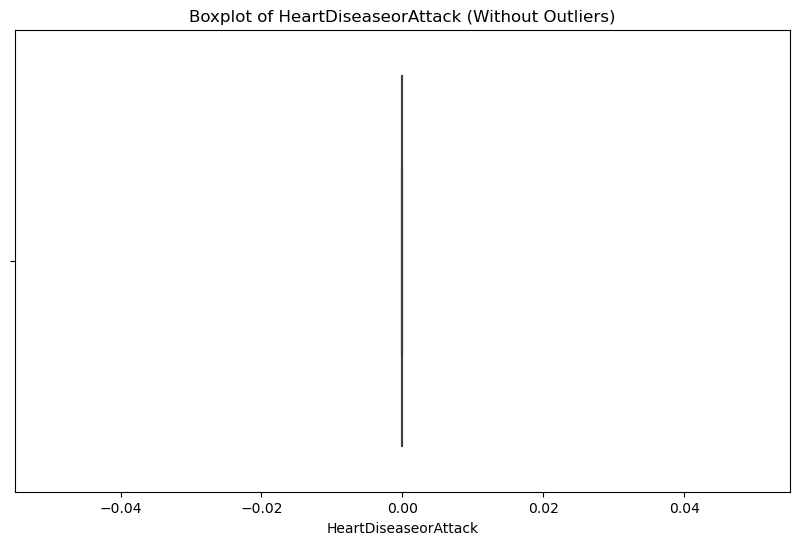

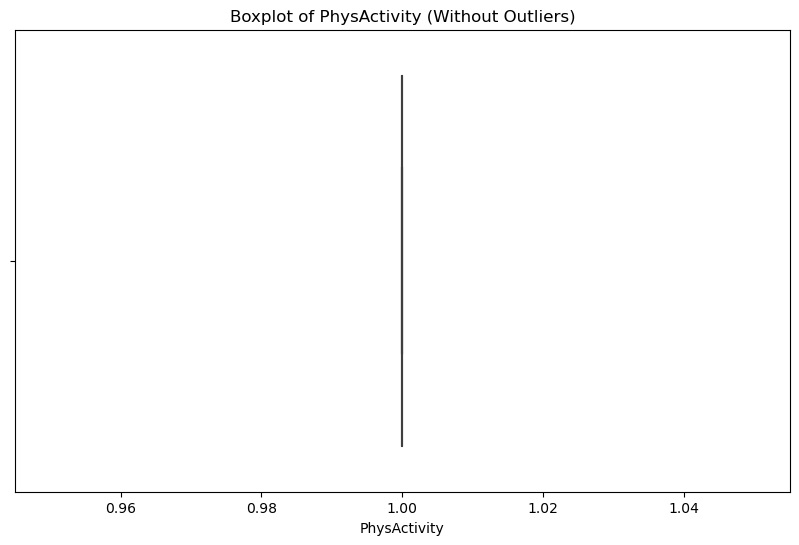

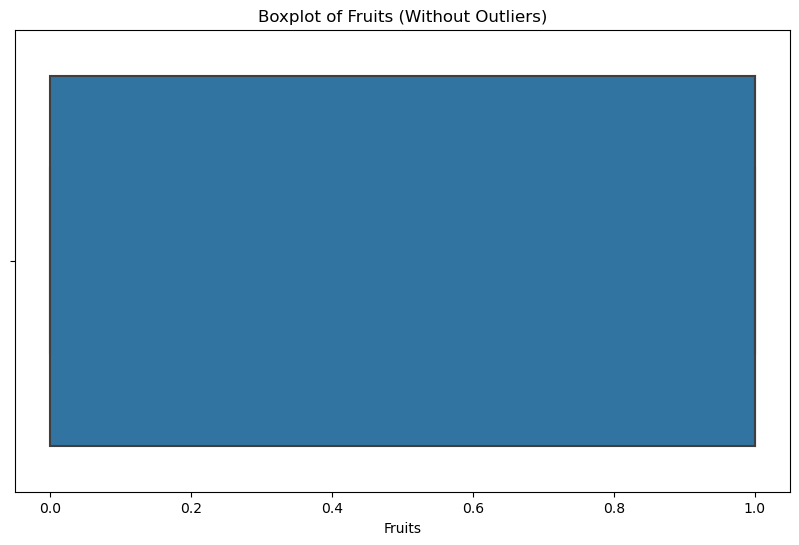

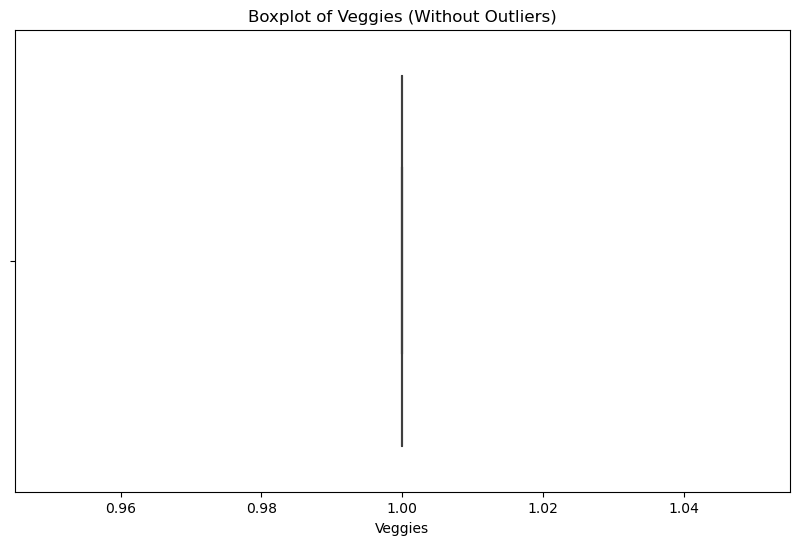

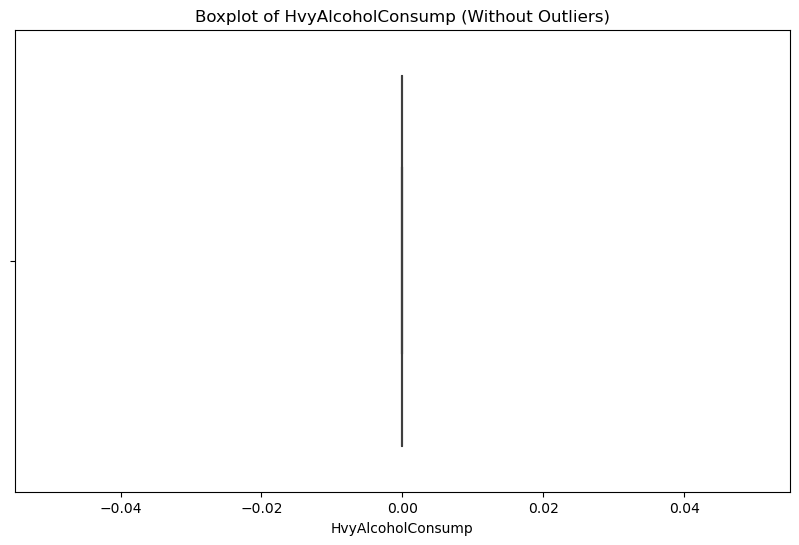

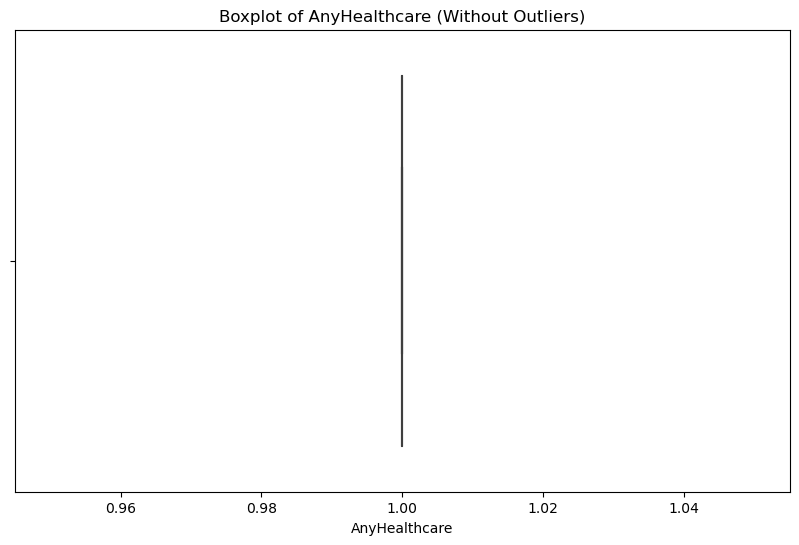

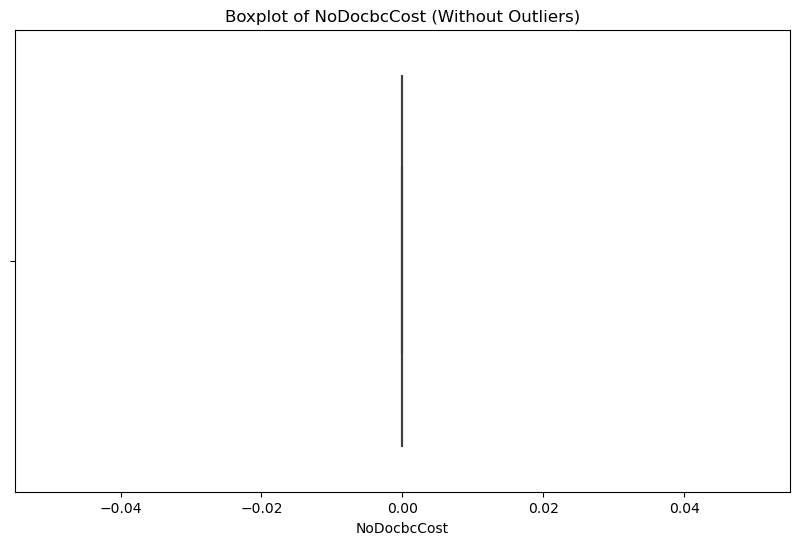

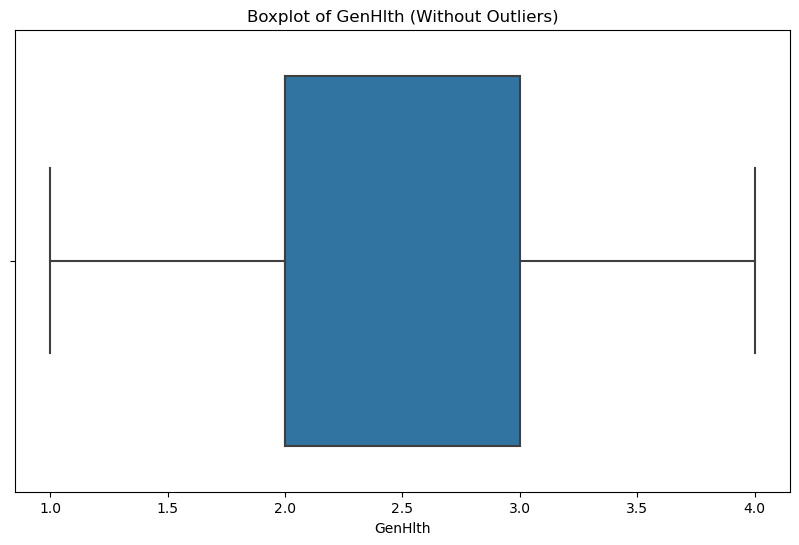

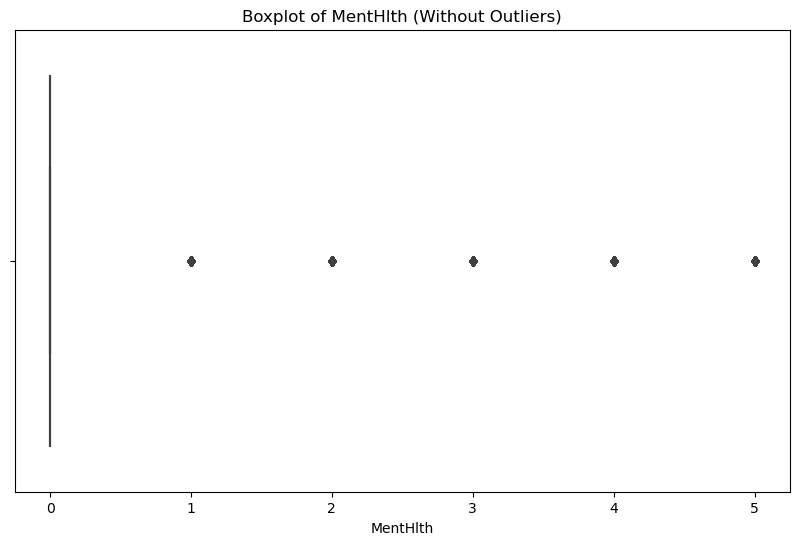

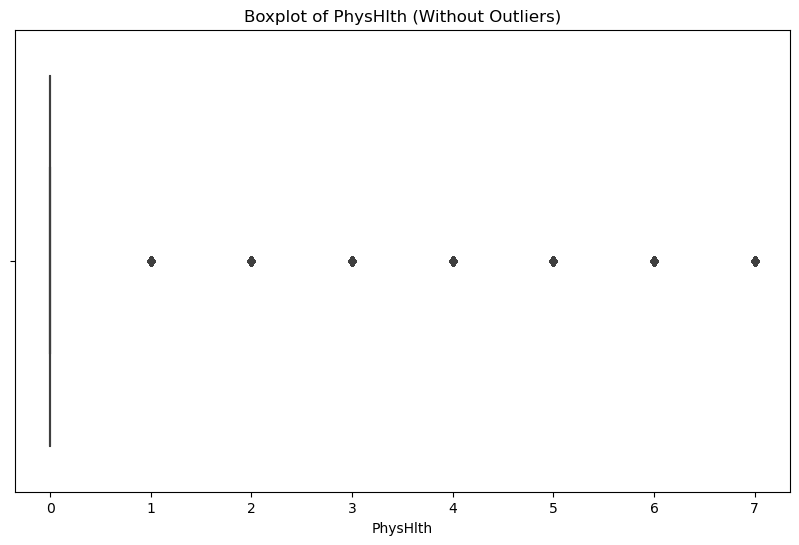

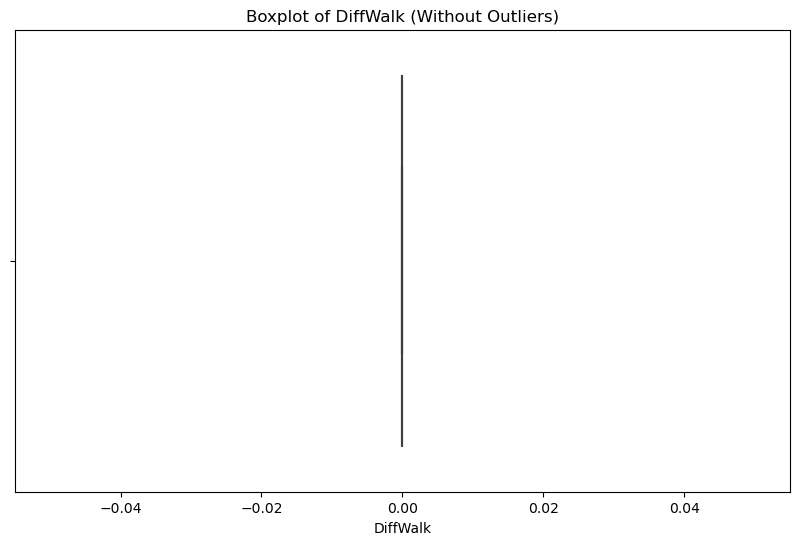

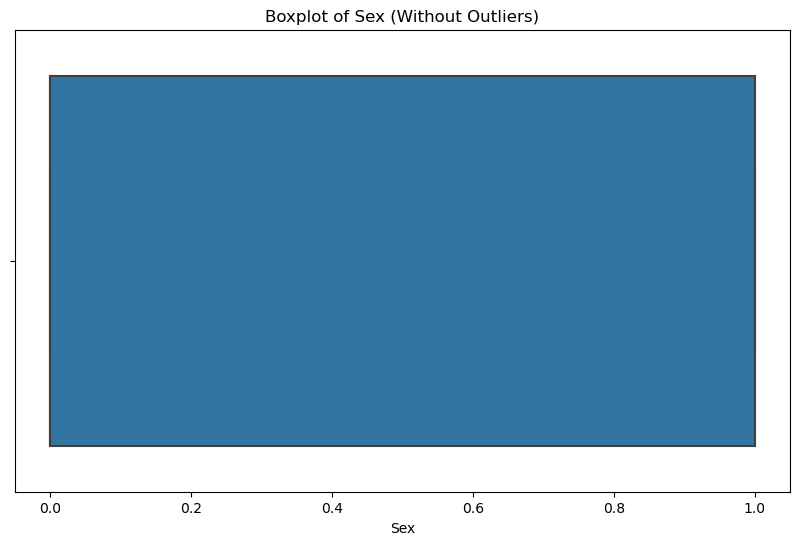

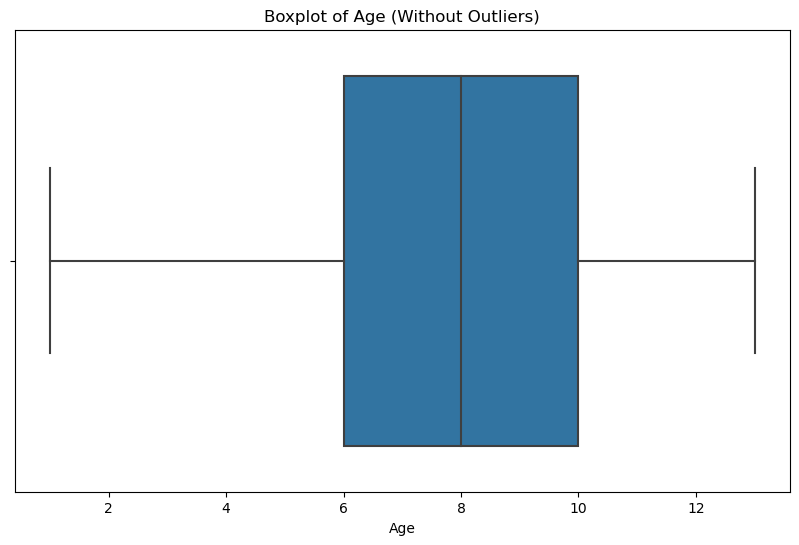

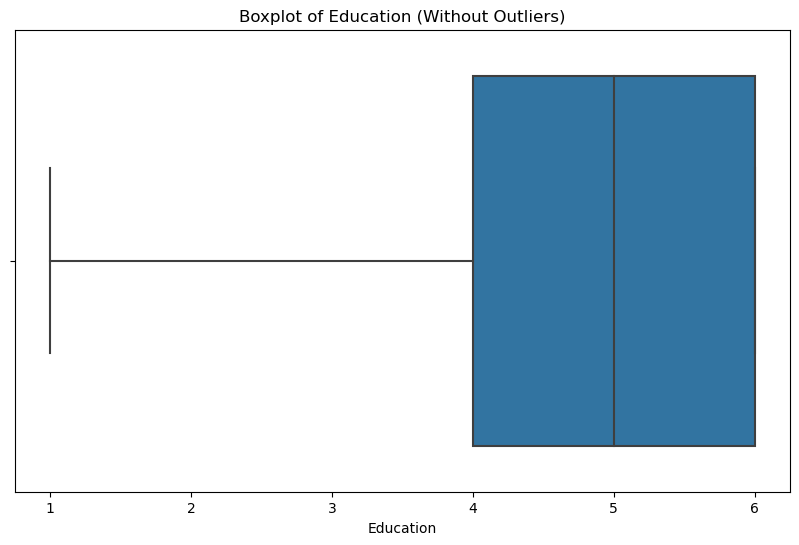

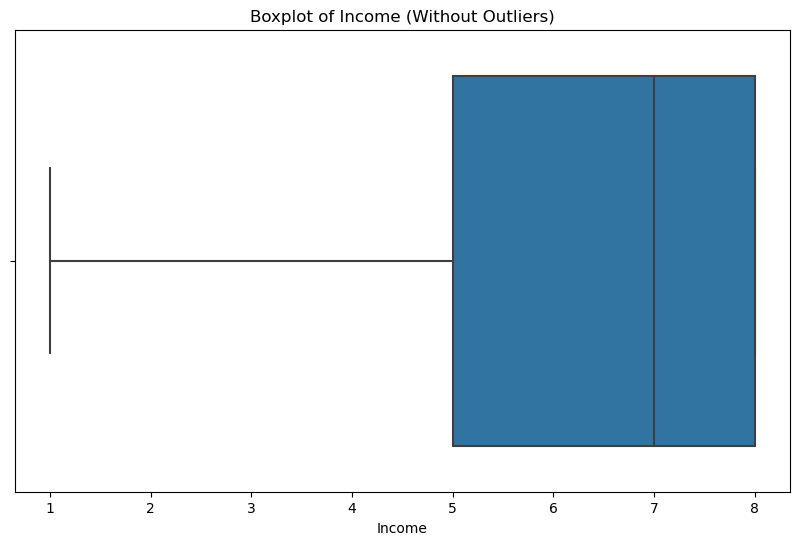

In [20]:
# Check for outliers using IQR (Interquartile Range)
Variable = ['Diabetes_No DiabetesPrediabetesDiabetes', 'HighBP', 'HighChol',
            'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
df_fltr = pd.DataFrame()
for filter in Variable:
    Q1 = df[filter].quantile(0.25)
    Q3 = df[filter].quantile(0.75)
    IQR = Q3-Q1
# Quartile range to find the outliers
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    column_filtered = df[(df[filter] >= lower) & (df[filter] <= upper)]
    df_fltr[filter] = column_filtered[filter]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=filter, data=column_filtered)
    plt.title(f'Boxplot of {filter} (Without Outliers)')
    plt.show()


In [21]:
# Checking whether the dataset is balanced or not.
yhat = df_imputed['Diabetes_No DiabetesPrediabetesDiabetes']
yhat.value_counts()


0.0    211726
2.0     33819
1.0      8135
Name: Diabetes_No DiabetesPrediabetesDiabetes, dtype: int64

# Preprocessing


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler, FunctionTransformer, StandardScaler

# Suppose you have a dataset `df`, target variable `Yhat` and predictors `predictors`
X = df_imputed[['HighBP', 'HighChol',
                'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
                'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
                'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = df_imputed["Diabetes_No DiabetesPrediabetesDiabetes"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [23]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
# Create a SMOTEENN instance
#smote = SMOTEENN(random_state=52)

# Resample the training data
#X_res, y_res = smote.fit_resample(X_train, y_train)


In [24]:
# scaling data
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
sc = StandardScaler()

# Fit the StandardScaler instance and scale the training data
X_res_scaled = sc.fit_transform(X_res)

# Scale the test data
X_test_scaled = sc.transform(X_test)


# Model Training


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a RandomForestClassifier instance with specific hyperparameters
rf = RandomForestClassifier(
    n_estimators=200, max_depth=15, min_samples_split=10, random_state=42)

# Fit the model
rf.fit(X_res, y_res)

# Make predictions on the test set
rf_predictions = rf.predict(X_test)

# Print the classification report
print("Random Forest Classifier")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     42404
         1.0       0.06      0.02      0.03      1638
         2.0       0.39      0.46      0.42      6694

    accuracy                           0.81     50736
   macro avg       0.45      0.46      0.45     50736
weighted avg       0.80      0.81      0.80     50736

Confusion Matrix:
[[37720   341  4343]
 [ 1125    26   487]
 [ 3542    53  3099]]


When SMOTEENN was used the results were:

Random Forest Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80     42404
         1.0       0.05      0.05      0.05      1638
         2.0       0.30      0.79      0.43      6694

    accuracy                           0.69     50736
   macro avg       0.43      0.51      0.43     50736
weighted avg       0.83      0.69      0.73     50736

Confusion Matrix:
[[29650  1336 11418]
 [  515    79  1044]
 [ 1201   228  5265]]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a Logistic Regression instance
lr = LogisticRegression(
    solver='liblinear', class_weight='balanced', random_state=42)

# Fit the model
lr.fit(X_res_scaled, y_res)

# Make predictions on the test set
lr_predictions = lr.predict(X_test_scaled)

# Print the classification report
print("Logistic Regression")
print("Classification Report:")
print(classification_report(y_test, lr_predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     42404
         1.0       0.05      0.22      0.09      1638
         2.0       0.32      0.62      0.43      6694

    accuracy                           0.67     50736
   macro avg       0.44      0.51      0.44     50736
weighted avg       0.83      0.67      0.73     50736

Confusion Matrix:
[[29327  5137  7940]
 [  520   365   753]
 [ 1199  1337  4158]]


When SMOTEENN was used the results were

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.59      0.73     42404
         1.0       0.05      0.34      0.08      1638
         2.0       0.33      0.63      0.43      6694

    accuracy                           0.59     50736
   macro avg       0.45      0.52      0.42     50736
weighted avg       0.85      0.59      0.67     50736

Confusion Matrix:
[[25210  9384  7810]
 [  333   562   743]
 [  685  1810  4199]]

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree
dtree = DecisionTreeClassifier(max_depth=15,min_samples_split=10, random_state=42)

# Train Decision Tree Classifier
dtree.fit(X_res, y_res)

# Predict the response for test dataset
dt_predictions = dtree.predict(X_test)

# Print the classification report
print("Decision tree")
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))


              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     42404
         1.0       0.05      0.06      0.06      1638
         2.0       0.36      0.44      0.40      6694

    accuracy                           0.78     50736
   macro avg       0.44      0.45      0.44     50736
weighted avg       0.79      0.78      0.78     50736

Confusion Matrix:
[[36285  1417  4702]
 [ 1063    99   476]
 [ 3396   353  2945]]


When SMOTEENN was used the results where:

precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     42404
         1.0       0.05      0.14      0.07      1638
         2.0       0.29      0.67      0.40      6694

    accuracy                           0.65     50736
   macro avg       0.42      0.49      0.42     50736
weighted avg       0.82      0.65      0.71     50736

Confusion Matrix:
[[28360  3721 10323]
 [  528   233   877]
 [ 1281   919  4494]]

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb.fit(X_res_scaled, y_res)

# Make predictions on the test set
y_pred = gb.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89     42404
         1.0       0.03      0.01      0.01      1638
         2.0       0.39      0.48      0.43      6694

    accuracy                           0.80     50736
   macro avg       0.43      0.46      0.44     50736
weighted avg       0.80      0.80      0.80     50736

Confusion Matrix:
[[37363   405  4636]
 [ 1108    13   517]
 [ 3413    54  3227]]


In [43]:
import xgboost as xgb

# Create a DMatrix (data structure used by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this dataset

# Train the model
bst = xgb.train(param, dtrain, 20)  # 20 is the number of training iterations

# Make prediction
preds = bst.predict(dtest)

# Assign the class with the highest probability
preds_class = np.argmax(preds, axis=1)

# Print the classification report
print("XG boost")
print("Classification Report:")
print(classification_report(y_test, preds_class))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds_class))

XG boost
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     42404
         1.0       0.00      0.00      0.00      1638
         2.0       0.56      0.17      0.26      6694

    accuracy                           0.84     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.79      0.84      0.80     50736

Confusion Matrix:
[[41634     0   770]
 [ 1500     0   138]
 [ 5539     0  1155]]


c:\Users\91628\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91628\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91628\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Selection


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

#  Define the hyperparameters
# hyperparameters = {
#       'n_estimators': [50, 100, 200],
#       'max_depth': [None, 5, 10, 15],
#       'min_samples_split': [2, 5, 10],
#       'min_samples_leaf': [1, 2, 4],
#   }

#  Initialize the RandomForestClassifier
# rf = RandomForestClassifier(criterion = 'entropy',class_weight="balanced", random_state=42)

#  Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=hyperparameters, cv=5, n_jobs=-1)

# # # # Fit the model
# grid_search.fit(X_res, y_res)

#  Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# Get the best model
# best_rf = grid_search.best_estimator_

# Predict with the best model
# rf_predictions1 = best_rf.predict(X_test)

#  Print the classification report
# print("Random Forest Classifier")
# print("Classification Report:")
# print(classification_report(y_test, rf_predictions1))

# Print the confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, rf_predictions1))


Random Forest Classifier
Classification Report:
precision recall f1-score support

         0.0       0.87      0.94      0.91     42404
         1.0       0.07      0.01      0.01      1638
         2.0       0.44      0.30      0.36      6694

    accuracy                           0.83     50736

macro avg 0.46 0.42 0.43 50736
weighted avg 0.79 0.83 0.80 50736


# Test results


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer


def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


# Use your prediction values here
auc = multiclass_roc_auc_score(y_test, rf_predictions)
print("ROC AUC Score with Random forest:", auc)


ROC AUC Score with Random forest: 0.661088784164026


In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer


def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


# Use your prediction values here
auc = multiclass_roc_auc_score(y_test, dt_predictions)
print("ROC AUC Score with decision tree:", auc)


ROC AUC Score with decision tree: 0.6556072162775921


In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer


def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


# Use your prediction values here
auc = multiclass_roc_auc_score(y_test, lr_predictions)
print("ROC AUC Score with linear regression:", auc)


ROC AUC Score with linear regression: 0.732224242274798
